# Examen Practic

In [53]:
#1
#Bestimme die allgemiene L ̈osung der DGL. (x^2+ 9)y"+ 2xy'= 0.
#/a
x = var('x')
y=function('y')(x)
eqd=(x^2 + 9)*diff(y,x,2) + 2 * x * diff(y,x) == 0
desolve(eqd, y)

1/3*_K1*arctan(1/3*x) + _K2

In [54]:
#b
sol1=desolve(eqd, y, ics=[3, 2 * pi, 2/3])
sol1

pi + 4*arctan(1/3*x)

In [55]:
#2 Betrachte die folgende DGL: 3x' -  x = 2 sin(t)
#a. (1p) Bestimme die allgemiene Losung der DGL und stelle den Graph einer Losung dar.
#b. (1p) Sei x(0) = b. Bestimme b apartine R, so dass die Losung des Cauchyproblems periodisch sei.



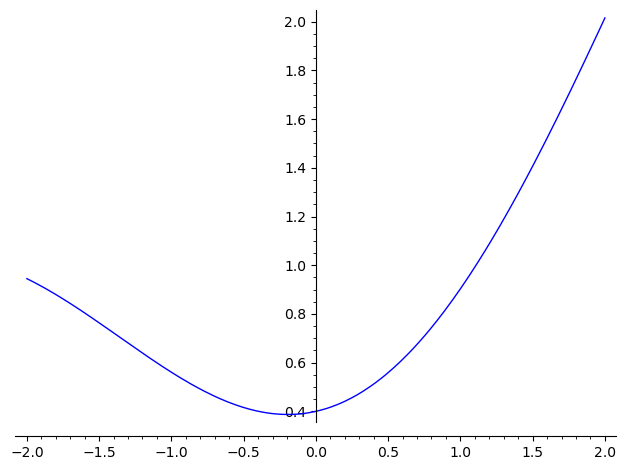

In [57]:
t = var('t')
x = function('x')(t)
eqd = 3 * diff(x, t) - x == 2 * sin(t)
sol = desolve(eqd, x)
_C= var('_C')

sol1 = sol.subs(_C == 1)  # Assign a specific value to _C
plot(sol1, (t, -2, 2))  # Use (t, -2, 2) to define the variable and interval for plotting


In [60]:
sol

-3/5*cos(t) - 1/5*sin(t)

In [61]:
desolve(eqd, x)

-1/5*((3*cos(t) + sin(t))*e^(-1/3*t) - 5*_C)*e^(1/3*t)

In [58]:
#Sei x(0) = b, b apartine de R, astfel incat rezolvarea cauchy problem sa fie periodica
t = var('t')
x = function('x')(t)
eqd = 3 * diff(x, t) - x == 2 * sin(t)
b = var('b')  

sol = desolve(eqd, x, ics=[0, b])

b_values = solve(sol.subs(t == 2 * pi) == b, b)

for b_val in b_values:
    print("Value of b for periodic solution:", b_val.rhs())


Value of b for periodic solution: -3/5


In [59]:
t = var('t')
x = function('x')(t)
eqd = 3 * diff(x, t) - x == 2 * sin(t)
b = -3/5  

sol = desolve(eqd, x, ics=[0, b])

periodic_solution = sol.subs(t == 2 * pi)
is_periodic = periodic_solution == b
print("Is the solution periodic?", is_periodic)


Is the solution periodic? (-3/5) == (-3/5)


In [14]:
#3 Betrachte das folgende DGL-System
#a. (0.5p) Bestimme die allgemeine Losung.

t=var('t')
x = function('x')(t)
y = function('y')(t)
deq1 = diff(x, t) == x + 3 * y
deq2 = diff(y, t) == x - y
syst = [deq1, deq2]
desolve_system(syst, [x,y])

[x(t) == 3/4*(x(0) + y(0))*e^(2*t) + 1/4*(x(0) - 3*y(0))*e^(-2*t),
 y(t) == 1/4*(x(0) + y(0))*e^(2*t) - 1/4*(x(0) - 3*y(0))*e^(-2*t)]

In [15]:
C1, C2 = var('C1', 'C2')
desolve_system(syst, [x,y], [0, C1, C2])

[x(t) == 3/4*(C1 + C2)*e^(2*t) + 1/4*(C1 - 3*C2)*e^(-2*t),
 y(t) == 1/4*(C1 + C2)*e^(2*t) - 1/4*(C1 - 3*C2)*e^(-2*t)]

In [16]:
sol = desolve_system(syst, [x,y], [0, C1, C2])
sol_x(t, C1, C2) = sol[0].rhs()
sol_x

(t, C1, C2) |--> 3/4*(C1 + C2)*e^(2*t) + 1/4*(C1 - 3*C2)*e^(-2*t)

In [17]:
sol_y(t, C1, C2) = sol[1].rhs()
sol_y

(t, C1, C2) |--> 1/4*(C1 + C2)*e^(2*t) - 1/4*(C1 - 3*C2)*e^(-2*t)

In [18]:
#3/b b. Bestimme die Losung des Systems die die Bedingungen erfullt:
#x(0) = 1; y(0) = 0

vars = [x,y]
in_cond=[0,1,0]
sol=desolve_system(syst,vars,in_cond)
sol

[x(t) == 3/4*e^(2*t) + 1/4*e^(-2*t), y(t) == 1/4*e^(2*t) - 1/4*e^(-2*t)]

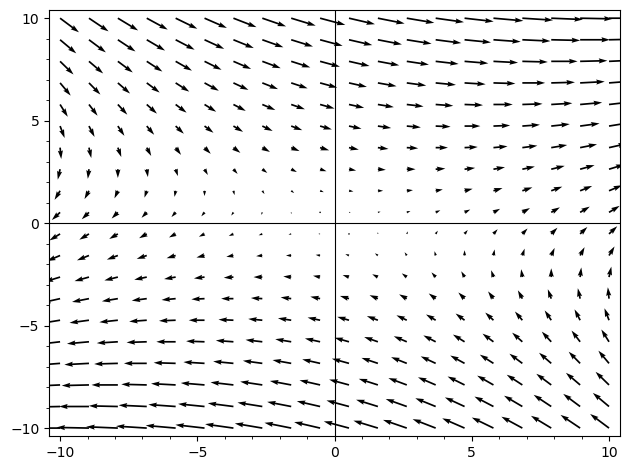

In [20]:
#3/c.Stelle graphisch das Phasenlportat dar und bestimme ob die folgenden Gleichungen gelten:

u,v = var('C1, C2')
f1(u,v) = u + 3*v
f2(u,v) = u - v
plot_vector_field([f1(u,v), f2(u,v)], [u,-10,10], [v, -10, 10])

In [21]:
#lim(t->inf) x(t) = 0, lim(t->inf) y(t) = 0
limit(3/4*e^(2*t) + 1/4*e^(-2*t), t = infinity)


+Infinity

In [22]:
limit(1/4*e^(2*t) - 1/4*e^(-2*t), t = infinity)

+Infinity

In [23]:
# =>lim t->infinity x(t) = 0 bzw. lim t->infinty y(t) = 0 gelten nicht

In [43]:
#4
#Bilde die lineare homogene DGL fur das angegebene Losungsfundamentalsystem:
#S={exp(3x), x + 2}:

reset()
x = var('x')
y = function('y')(x)
y1 = function('y1')(x)
y2 = function('y2')(x)
y1 = lambda x: exp(3 * x)
y2 = lambda x: x + 2
W = matrix([[y, y1(x), y2(x)], [diff(y, x), diff(y1(x), x), diff(y2(x), x)], [diff(y, x, 2), diff(y1(x), x, 2), diff(y2(x), x, 2)]])
W


[            y(x)          e^(3*x)            x + 2]
[   diff(y(x), x)        3*e^(3*x)                1]
[diff(y(x), x, x)        9*e^(3*x)                0]

In [62]:
det(W) == 0

9*(x + 2)*e^(3*x)*diff(y(x), x) - 9*e^(3*x)*y(x) - (3*(x + 2)*e^(3*x) - e^(3*x))*diff(y(x), x, x) == 0

In [65]:
det_W = det(W)

In [69]:
det_W == 0

9*(x + 2)*e^(3*x)*diff(y(x), x) - 9*e^(3*x)*y(x) - (3*(x + 2)*e^(3*x) - e^(3*x))*diff(y(x), x, x) == 0

In [70]:
is_det_zero = bool(det_W == 0)
is_det_zero

False